In [2]:
#載入並初始化nanoACT
from nanoact import nanoact
dumb = nanoact.NanoAct()

In [2]:
#將fastq.gz檔案合併成一個fastq檔案
all_fastq = dumb.combine_fastq(src = "./nanoact/sample/1_raw_reads/",
                               des = "./nanoact/sample/2_merged_fastq/",
                               name = "all.fastq"
                               )

[15:35:02] Found fastq file: FAW73888_d763411f_40013a17_1.fast5.fastq.gz
[15:35:02] Found fastq file: FAW73888_d763411f_40013a17_2.fast5.fastq.gz
[15:35:02] Found fastq file: FAW73888_d763411f_40013a17_0.fast5.fastq.gz


In [5]:
# 透過品質及長度過濾fastq檔案
# See also nanofilt()
filtered_fastq = dumb.qualityfilt(src = "./nanoact/sample/2_merged_fastq/all.fastq",
                           des = "./nanoact/sample/3_filtered_fastq/",
                           name = 'all.fastq',
                           QSCORE = 7,  #recommended 7-9
                           MIN_LEN = 2500, #depends on the length of your reads
                           MAX_LEN = 3500 #depends on the length of your reads
                           )

[15:35:24] Start Qualityfilt...
[15:35:24] QSCORE: 7, MIN_LEN: 2500, MAX_LEN: 3500
[15:35:30] 2481/12000 (20.67%) reads were passed quality filter


In [6]:
##透過barcode_index將fastq檔案分類(demultiplex)
#modified from Krehenwinkel, Henrik, Aaron Pomerantz, James B. Henderson, Susan R. Kennedy, Jun Ying Lim, Varun Swamy, Juan Diego Shoobridge, et al. 2019. “Nanopore Sequencing of Long Ribosomal DNA Amplicons Enables Portable and Simple Biodiversity Assessments with High Phylogenetic Resolution across Broad Taxonomic Scale.” GigaScience 8 (5). https://doi.org/10.1093/gigascience/giz006.
demultiplexed = dumb.singlebar(src = "./nanoact/sample/3_filtered_fastq/all.fastq", #Input: 單個fastq檔案，例如 all.fastq
                               des =  "./nanoact/sample/4_demultiplex/", #Output: 一個資料夾，程式會在該資料夾中輸出以SampleID為檔名的fastq檔案或是fasta檔案（由output_format決定），例如 SampleID.fastq
                               BARCODE_INDEX_FILE =  "./nanoact/sample/barcode.csv", #BARCODE_INDEX_FILE: barcode資料庫，可以是csv或是tsv檔案，例如 barcode.csv。必須包含SampleID, FwIndex, RvAnchor、ExpectedLength四個欄位。
                               mismatch_ratio_f = 0.1, #mismatch_ratio_f: FwIndex容許的錯誤率，預設為0.15。例如barcode長度為20bp，則容許0.15*20=3bp的錯誤(edit distance)。
                               mismatch_ratio_r = 0.1, #mismatch_ratio_r: RvAnchor容許的錯誤率，預設為0.15。
                               expected_length_variation = 0.3, #expected_length_variation: 預期的read長度變異，預設為0.3。例如ExpectedLengt為300bp，則容許0.3*300=90bp的變異。
                               search_range=150, #search_range: 搜尋barcode的範圍，預設為150bp。代表搜尋範圍為前150bp和後150bp。
                               output_format="both" #output_format: 輸出檔案的格式，預設為both。可以是fastq或是fasta或是fas(fasta格式但附檔名為fas)。both代表同時輸出fastq和fasta。
                               )

[15:36:49] BARCODE_INDEX_FILE loaded
[15:36:51] 498/2481 (20.07%) reads were demultiplexed successfully


In [8]:
##Orientation，透過FwPrimer和RvPrimer將反向的序列轉換成正向的序列
orientation = dumb.orientation( src= "./nanoact/sample/4_demultiplex/",  #Input: 一個資料夾，資料夾中包含以SampleID為檔名的fastq檔案或是fasta檔案（由input_format決定），例如 SampleID.fastq
                                des= "./nanoact/sample/5_orientation/",  #Output: 一個資料夾，程式會在該資料夾中輸出以SampleID為檔名的fastq檔案或是fasta檔案（由output_format決定），例如 SampleID.fastq
                                input_format = "fastq", #input_format: 輸入檔案的格式，預設為fastq。可以是fastq或是fasta或是fas(副檔名為fas之fasta格式檔案)。
                                output_format = "both", #output_format: 輸出檔案的格式，預設為both。可以是fastq或是fasta。both代表同時輸出fastq和fasta。
                                BARCODE_INDEX_FILE = "./nanoact/sample/barcode.csv", #BARCODE_INDEX_FILE: barcode資料庫，可以是csv或是tsv檔案，例如 barcode.csv。
                                FwPrimer = "FwPrimer", #FwPrimer: FwPrimer的欄位名稱，預設為FwPrimer。
                                RvPrimer = "RvPrimer", #RvPrimer: RvPrimer的欄位名稱，預設為RvPrimer。
                                search_range=200, #search_range: 搜尋FwPrimer和RvPrimer的範圍，預設為200bp。代表搜尋範圍為前200bp和後200bp。
                                )

[15:37:12] T24.fas is not in the accepted input format, skipping
[15:37:12] T4.fas is not in the accepted input format, skipping
[15:37:12] Processing T2.fastq
[15:37:12] T2.fas is not in the accepted input format, skipping
[15:37:12] Processing T6.fastq
[15:37:12] T15.fas is not in the accepted input format, skipping
[15:37:12] Processing T4.fastq
[15:37:12] T13.fas is not in the accepted input format, skipping
[15:37:12] T5.fas is not in the accepted input format, skipping
[15:37:12] T27.fas is not in the accepted input format, skipping
[15:37:12] Processing T14.fastq
[15:37:12] T17.fas is not in the accepted input format, skipping
[15:37:12] Processing T20.fastq
[15:37:12] T8.fas is not in the accepted input format, skipping
[15:37:12] Processing T18.fastq
[15:37:12] Processing T3.fastq
[15:37:12] T11.fas is not in the accepted input format, skipping
[15:37:12] T19.fas is not in the accepted input format, skipping
[15:37:12] Processing T25.fastq
[15:37:12] T28.fas is not in the acce

[15:37:13] T1.fas is not in the accepted input format, skipping
[15:37:13] Processing T31.fastq
[15:37:13] T22.fas is not in the accepted input format, skipping
[15:37:13] T30.fas is not in the accepted input format, skipping
[15:37:13] T23.fas is not in the accepted input format, skipping
[15:37:13] Processing T5.fastq
[15:37:13] Processing T28.fastq
[15:37:13] Processing T13.fastq
[15:37:13] Processing T12.fastq
[15:37:13] Processing T1.fastq
[15:37:13] T6.fas is not in the accepted input format, skipping
[15:37:13] T3.fas is not in the accepted input format, skipping
[15:37:13] Processing T9.fastq
[15:37:13] Processing T23.fastq
[15:37:13] T12.fas is not in the accepted input format, skipping
[15:37:13] 2_Singlebar_stat.csv is not in the accepted input format, skipping
[15:37:13] Processing T16.fastq
[15:37:13] Processing T19.fastq
[15:37:13] T9.fas is not in the accepted input format, skipping
[15:37:13] T20.fas is not in the accepted input format, skipping
[15:37:13] Processing T2

In [9]:
# 將barcode, Primer等人造序列去除
# 有兩種模式，一種是table，一種是case
# model = table時，需要輸入barcode_index_file，並且需要指定fw_col和rv_col。程式會透過barcode_index_file中的SampleID, FwPrimer, RvPrimer欄位來去除人造序列。
# model = case時，則是利用singlebar()分類時，會對raw reads找到的FwIndex及RvAnchor做小寫標記，trim_reads()依據小寫標記的序列位置來去除人造序列。

dumb.trim_reads (src="./nanoact/sample/5_orientation/",   #Input 一個資料夾，資料夾中包含以SampleID為檔名的fastq檔案或是fasta檔案（由input_format決定），例如 SampleID.fastq
                 des="./nanoact/sample/6_trimmed/",   #Output 一個資料夾，程式會在該資料夾中輸出以SampleID為檔名的fastq檔案或是fasta檔案（由output_format決定），例如 SampleID.fastq
                BARCODE_INDEX_FILE = "./nanoact/sample/barcode.csv", #barcode資料庫，可以是csv或是tsv檔案，例如 barcode.csv。僅在mode為table時需要。
                fw_col = "FwIndex",   #forward的欄位名稱，預設為FwPrimer。僅在mode為table時需要。
                rv_col = "RvPrimer",  #reverse的欄位名稱，預設為RvPrimer。僅在mode為table時需要。
                input_format="fastq", #input_format: 輸入檔案的格式，預設為fastq。可以是fastq或是fasta。
                output_format="both", #output_format: 輸出檔案的格式，預設為both。可以是fastq或是fasta。both代表同時輸出fastq和fasta。
                mode="case", #mode: 輸入barcode的模式，預設為table。可以是table或是case。table代表使用barcode_index_file，case代表使用singlebar的小寫標記的barcode。
                fw_offset = 0, #從距離找到的切除位點開始往後切除幾個bp，預設為0，可以是負數。例如fw_offset=-10，則從距離找到的切除位點開始往前切除10個bp。
                rv_offset = 0, #從距離找到的切除位點開始往前切除幾個bp，預設為0，可以是負數。例如rv_offset=-10，則從距離找到的切除位點開始往後切除10個bp。
                mismatch_ratio_f = 0.1, #FwIndex容許的錯誤率，預設為0.15。例如barcode長度為20bp，則容許0.15*20=3bp的錯誤(edit distance)。 僅在mode為table時需要。
                mismatch_ratio_r = 0.1, #RvAnchor容許的錯誤率，預設為0.15。 僅在mode為table時需要。
                discard_no_match = False, #如果沒有找到barcode，是否捨棄該序列，預設為False。 僅在mode為table時需要。
                check_both_directions = True, #是否同時檢查正向和反向序列，如果反向序列中找到barcode，則輸出反向序列，預設為True。 僅在mode為table時需要。
                reverse_complement_rv_col = True, #是否將RvAnchor欄位的序列反向互補後再進行搜尋，預設為True。 僅在mode為table時需要。
                search_range=100, #搜尋FwIndex和RvAnchor的範圍，預設為200bp。代表搜尋範圍為前200bp和後200bp。 僅在mode為table時需要。
                )

Notice: mode is set to 'case', arguments other than src, des, fw_offset, rv_offset,input_format, output_format will be ignored
[15:37:20] T28.fasta is not in the accepted inpute format, skipping
[15:37:20] T24.fas is not in the accepted inpute format, skipping
[15:37:20] T4.fas is not in the accepted inpute format, skipping
[15:37:20] Tirmming T2.fastq
[15:37:20] T2.fas is not in the accepted inpute format, skipping
[15:37:20] Tirmming T6.fastq
[15:37:20] T15.fas is not in the accepted inpute format, skipping
[15:37:20] Tirmming T4.fastq
[15:37:20] T4.fasta is not in the accepted inpute format, skipping
[15:37:20] T13.fas is not in the accepted inpute format, skipping
[15:37:20] T5.fas is not in the accepted inpute format, skipping
[15:37:20] T22.fasta is not in the accepted inpute format, skipping
[15:37:20] T27.fas is not in the accepted inpute format, skipping
[15:37:20] Tirmming T14.fastq
[15:37:20] T15.fasta is not in the accepted inpute format, skipping
[15:37:20] T17.fas is not 

In [10]:
#Clustering，將序列分群。
#一個barcode下，在許多情境下raw reads內可能包含許多異質的序列。
#例如由土壤放大的16S rRNA gene，可能包含多種細菌的16S rRNA gene(meta-barcoding)。
#又或是來自分析過程中的污染、非專一性放大產物、chimera等等。
#若直接將異質的raw reads進行後續分析，會導致具有許多雜訊的結果
#這裡介紹mmseqs，本工具也實作了其他的分群工具，請見nanoACT tutorial
dumb.mmseqs_cluster(src = "./nanoact/sample/6_trimmed/",
                    des = "./nanoact/sample/7_cluster/",
                    min_seq_id=0.8, #min_seq_id sets the minimum sequence identity threshold for prefiltering (pre-clustering). 
                    #Sequences with pairwise similarity below this value will not be clustered together.
                    #Set higher values for more stringent prefiltering. (Save time)
                    cluster_mode=0, #See mmseqs2 document: https://mmseqs.com/latest/userguide.pdf
                    cov_mode=0, #See mmseqs2 document: https://mmseqs.com/latest/userguide.pdf
                    k=14, #k specifies the length of k-mers length that will be used to compute sequence similarity.
                    #A k-mer is a substring of length k found in a sequence.
                    #   Increasing the value of k increases the specificity of sequence similarity, but also increases
                    #   the computational (memory) cost.
                    #   If you receive a memory error, try reducing the value of k.
                    kmer_per_seq = 20, #Only used when cluster_mode="linclust", see mmseqs2 document: https://mmseqs.com/latest/userguide.pdf
                    s=7.5,# s sets the sensitivity of the clustering. values between 1 and 8.5.
                    #   Increasing the value of s increases the sensitivity of the clustering (more clusters),
                    #   but also increases the false positive rate (more spurious clusters).
                    #   If you receive too many clusters, try reducing the value of s.
                    min_read_num=0, #min_read_num: This sets the minimum number of reads in a cluster.
                    #    Clusters with fewer reads than this value will be discarded.
                    input_format = "fastq", # input_format: 輸入檔案的格式，預設為fastq。可以是fastq或是fasta。
                    output_format = "both", # output_format: 輸出檔案的格式，預設為both。可以是fastq或是fasta。both代表同時輸出fastq和fasta。
                    )

[15:37:27] T24.fas is not in the accepted input format, skipping
[15:37:27] T4.fas is not in the accepted input format, skipping
[15:37:27] Clustering T2.fastq
[15:37:32] Number of clusters 5
[15:37:32] T2.fas is not in the accepted input format, skipping
[15:37:32] Clustering T6.fastq
[15:37:36] Number of clusters 1
[15:37:36] T15.fas is not in the accepted input format, skipping
[15:37:36] Clustering T4.fastq
[15:37:41] Number of clusters 3
[15:37:41] T13.fas is not in the accepted input format, skipping
[15:37:41] T5.fas is not in the accepted input format, skipping
[15:37:41] T27.fas is not in the accepted input format, skipping
[15:37:41] Clustering T14.fastq
[15:37:45] Number of clusters 5
[15:37:45] T17.fas is not in the accepted input format, skipping
[15:37:45] Clustering T20.fastq
[15:37:48] Number of clusters 2
[15:37:48] T8.fas is not in the accepted input format, skipping
[15:37:48] Clustering T18.fastq
[15:37:52] Number of clusters 4
[15:37:52] Clustering T3.fastq
[15:37:

'./nanoact/sample/7_cluster/'

In [3]:
#利用mafft將序列進行多序列排比，並且取得序列的consensus sequence
#本步驟完成後，建議先檢查各個序列的排比檔(aln_)是否有異質的情形(長短不一、align不良)

dumb.mafft_consensus (src="./nanoact/sample/7_cluster/", 
                      des="./nanoact/sample/8_consensus/",
                      minimal_reads=0,  #minimal_reads: 設定最少的序列數量，預設為0。例如minimal_reads=10，則只會輸出序列數量大於10的consensus sequence。
                      input_format="fastq"
                    )  


[16:00:56] Working on T10_cluster_0_r7 ...
[16:00:57] T11_cluster_4_r1.fas is not in the accepted input format, skipping
[16:00:57] Working on T3_cluster_1_r1 ...
[16:00:58] T13_cluster_1_r1.fas is not in the accepted input format, skipping
[16:00:58] Working on T2_cluster_4_r7 ...
[16:01:00] Working on T20_cluster_1_r7 ...
[16:01:02] Working on T9_cluster_0_r1 ...
[16:01:02] T31_cluster_1_r2.fas is not in the accepted input format, skipping
[16:01:02] T25_cluster_0_r5.fas is not in the accepted input format, skipping
[16:01:02] Working on T3_cluster_2_r1 ...
[16:01:03] T8_cluster_0_r2.fas is not in the accepted input format, skipping
[16:01:03] T11_cluster_2_r1.fas is not in the accepted input format, skipping
[16:01:03] Working on T4_cluster_0_r1 ...
[16:01:03] Working on T24_cluster_0_r1 ...
[16:01:04] Working on T31_cluster_0_r1 ...
[16:01:04] T25_cluster_1_r2.fas is not in the accepted input format, skipping
[16:01:04] T1_cluster_0_r8.fas is not in the accepted input format, skipp

'/home/raingel/桌面/nanopore_working/nanoACT/nanoact/sample/8_consensus'

In [6]:
#將consensus序列進行blast，並生成一個csv檔，內包含每個序列的blast結果
#Input: A folder containing fasta files named in the specified format
#Format: con_{sampleID}_cluster_{number}_r{reads_number}
#e.g.: con_2523_cluster_1_r499
#Output: A csv file named {name} is saved in the {des} folder
# `funguild`: This parameter is a boolean value that indicates whether to perform a Funguild search or not.
#             Funguild is a web-based annotation tool that allows users to predict the ecological functions of fungal communities based on their taxonomic composition.
# `startswith`: This parameter is a string indicating the prefix that the input fasta file names should start with. It is used to filter out files that do not match the given prefix.
# `query_range`: 代表該序列要用來送去blast的區間。一般建議不要超過500 bp。過長除了會造成blast伺服器負擔過重外，由於blast的排序同時考慮coverage及similarity。過長
#                的query將會導致高coverage但低similarity的hit排在前面，排擠掉中等coverage但高similarity的hit
#                輸入值為tuple，範例： 假設序列為 AAATTTCCC
#                query_range=(None,None)則代表完全不裁切
#                query_range=(0,None)也代表完全不裁切
#                query_range=(0,-1) 則代表從第0個位置(第1個 bp，程式上習慣從0開始計數)開始，到(不包含)倒數最後一個，實際query為 AAATTTCC
#                query_range=(2,5) 則代表從第2個開始，到(不包含)第5個，實際query為 ATT
#                query_range=(3,-3) 則代表從第3個開始，到(不包含)倒數第3個，實際query為 TTT
# `batch`: This parameter is an integer indicating the number of sequences to blast at a time.
#          The input sequences are divided into batches of size `batch`, and each batch is blasted separately.
#          This is done to avoid overloading the NCBI BLAST server with too many requests at once.
dumb.blast_2(src= "./nanoact/sample/8_consensus/", #Input: 一個資料夾，資料夾中包含以SampleID為檔名的fasta檔案，例如 SampleID.fasta
           des= "./nanoact/sample/8_consensus/", #Output: 一個資料夾，程式會在該資料夾中輸出一個csv檔案，檔案
           name="blast.csv", #name: 輸出檔案的檔名，預設為blast.csv。
           funguild=True, #funguild: 是否進行funguild的分析，預設為True。
           startswith ="con_", #startswith: 輸入fasta檔案的檔名所具有的開頭，預設為con_。
           input_format="fas", #input_format: 輸入fasta檔案的格式，預設為fasta, 若為fas則為副檔名為fas的fasta檔案。
           query_range=(200,400), #`query_range`: 代表該序列要用來送去blast的區間。一般建議不要超過500 bp。過長除了會造成blast伺服器負擔過重外，由於blast的排序同時考慮coverage及similarity。過長
                                #的query將會導致高coverage但低similarity的hit排在前面，排擠掉中等coverage但高similarity的hit
                                #輸入值為tuple，範例： 假設序列為 AAATTTCCC
                                #query_range=(None,None)則代表完全不裁切
                                #query_range=(0,None)也代表完全不裁切
                                #query_range=(0,-1) 則代表從第0個位置(第1個 bp，程式上習慣從0開始計數)開始，到(不包含)倒數最後一個，實際query為 AAATTTCC
                                #query_range=(2,5) 則代表從第2個開始，到(不包含)第5個，實際query為 ATT
                                #query_range=(3,-3) 則代表從第3個開始，到(不包含)倒數第3個，實際query為 TTT
           batch = 30 #`batch`: This parameter is an integer indicating the number of sequences to blast at a time.
                      #The input sequences are divided into batches of size `batch`, and each batch is blasted separately.
                      #This is done to avoid overloading the NCBI BLAST server with too many requests at once.
           )

[16:09:31] No sequence found, exiting


In [2]:
#我們也可以直接將trim過的raw reads直接對refseq等資料庫進行比對
#但這種方法由於計算量較大，所以無法直接使用blast的演算法進行
#這裡我們使用mmseqs2的演算法進行比對
#輸出的檔案中taxonomyResultReport可以使用pavian進行視覺化
#https://fbreitwieser.shinyapps.io/pavian/
#taxonomyResultReport.html是使用krona進行視覺化的結果
#taxonomyResult.tsv是比對結果，並且可用taxonomy_assign_visualizer()進行視覺化
dumb.taxonomy_assign(
                        src= "./nanoact/sample/6_trimmed/", #Input: 一個資料夾，資料夾中包含以SampleID為檔名的fastq檔案或是fasta檔案（由input_format決定），例如 SampleID.fastq
                        des= "./nanoact/sample/6_1_taxonomy_assign/", 
                        input_format='fastq', #input_format: 輸入檔案的格式，預設為fastq。可以是fastq或是fasta。
                        lca_mode = 3, #lca_mode: 解釋較為複雜，請見mmseqs2的文件: https://mmseqs.com/latest/userguide.pdf
                        custom_acc = ['LC729284', 'LC729293', 'LC729281', 'LC729294', 'LC729290', 'LC729267', 'LC729273'],
                        #custom_acc為一個自訂的accession no.的列表，可以讓mmseqs2加入進行比對
                        custom_gbff = [],
                        #custom_gbff為一個自訂的gbff檔案的"網址"，可以讓mmseqs2加入進行比對
                        ref_db = ['fungi.ITS','bacteria.16SrRNA'],#ref_db是ncbi的refdb資料庫，目前支援的資料庫如下
                        #archaea.16SrRNA
                        #archaea.23SrRNA
                        #archaea.5SrRNA
                        #bacteria.16SrRNA
                        #bacteria.23SrRNA
                        #bacteria.5SrRNA
                        #fungi.18SrRNA
                        #fungi.28SrRNA
                        #fungi.ITS
)

Getting taxinfo for each record...
6/6 taxid processed...
Merging custom database and ref_db...
>> /home/raingel/桌面/nanopore_working/nanoACT/nanoact/bin/mmseqs createtaxdb ./temp//ref_db tmp --ncbi-tax-dump ./temp//ncbi-taxdump/ --tax-mapping-file ./temp//ref_db.taxidmapping
Output:
createtaxdb ./temp//ref_db tmp --ncbi-tax-dump ./temp//ncbi-taxdump/ --tax-mapping-file ./temp//ref_db.taxidmapping 

MMseqs Version:        	7e2840992948ee89dcc336522dc98a74fe0adf00
NCBI tax dump directory	./temp//ncbi-taxdump/
Taxonomy mapping file  	./temp//ref_db.taxidmapping
Taxonomy mapping mode  	0
Taxonomy db mode       	1
Threads                	4
Verbosity              	3

Loading nodes file ... Done, got 2514642 nodes
Loading merged file ... Done, added 72907 merged nodes.
Loading names file ... Done
Init RMQ ...Done

Exception:
None
Processing file:  T2.fastq
>> /home/raingel/桌面/nanopore_working/nanoACT/nanoact/bin/mmseqs createdb ./temp//query.fas ./temp//T2_query_db
Output:
createdb ./temp//qu

The input files have no entry:  - ./temp//query.fas
Please check your input files. Only files in fasta/fastq[.gz|bz2] are supported
World Size: 4 dbSize: 0
World Size: 4 dbSize: 0
free(): corrupted unsorted chunks
Aborted (core dumped)
No datafile could be found for ./nanoact/sample/6_1_taxonomy_assign//T28_taxonomyResult!
Input ./nanoact/sample/6_1_taxonomy_assign//T28_taxonomyResult does not exist
Input ./nanoact/sample/6_1_taxonomy_assign//T28_taxonomyResult does not exist


>> /home/raingel/桌面/nanopore_working/nanoACT/nanoact/bin/mmseqs taxonomy ./temp//T28_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T28_taxonomyResult tmp --search-type 3 --lca-mode 3
Output:
taxonomy ./temp//T28_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T28_taxonomyResult tmp --search-type 3 --lca-mode 3 

MMseqs Version:                        	7e2840992948ee89dcc336522dc98a74fe0adf00
ORF filter                             	1
ORF filter e-value                     	100
ORF filter sensitivity                 	2
LCA mode                               	3
Taxonomy output mode                   	0
Majority threshold                     	0.5
Vote mode                              	1
LCA ranks                              	
Column with taxonomic lineage          	0
Compressed                             	0
Threads                                	4
Verbosity                              	3
Taxon blacklist                        	12908:unclassified sequences

The input files have no entry:  - ./temp//query.fas
Please check your input files. Only files in fasta/fastq[.gz|bz2] are supported
World Size: 4 dbSize: 0
World Size: 4 dbSize: 0
free(): corrupted unsorted chunks
Segmentation fault (core dumped)
No datafile could be found for ./nanoact/sample/6_1_taxonomy_assign//T23_taxonomyResult!
Input ./nanoact/sample/6_1_taxonomy_assign//T23_taxonomyResult does not exist
Input ./nanoact/sample/6_1_taxonomy_assign//T23_taxonomyResult does not exist
The input files have no entry:  - ./temp//query.fas
Please check your input files. Only files in fasta/fastq[.gz|bz2] are supported
World Size: 4 dbSize: 0
World Size: 4 dbSize: 0
No datafile could be found for ./nanoact/sample/6_1_taxonomy_assign//T16_taxonomyResult!
Input ./nanoact/sample/6_1_taxonomy_assign//T16_taxonomyResult does not exist
Input ./nanoact/sample/6_1_taxonomy_assign//T16_taxonomyResult does not exist


>> /home/raingel/桌面/nanopore_working/nanoACT/nanoact/bin/mmseqs taxonomy ./temp//T23_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T23_taxonomyResult tmp --search-type 3 --lca-mode 3
Output:
taxonomy ./temp//T23_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T23_taxonomyResult tmp --search-type 3 --lca-mode 3 

MMseqs Version:                        	7e2840992948ee89dcc336522dc98a74fe0adf00
ORF filter                             	1
ORF filter e-value                     	100
ORF filter sensitivity                 	2
LCA mode                               	3
Taxonomy output mode                   	0
Majority threshold                     	0.5
Vote mode                              	1
LCA ranks                              	
Column with taxonomic lineage          	0
Compressed                             	0
Threads                                	4
Verbosity                              	3
Taxon blacklist                        	12908:unclassified sequences

The input files have no entry:  - ./temp//query.fas
Please check your input files. Only files in fasta/fastq[.gz|bz2] are supported
World Size: 4 dbSize: 0
World Size: 4 dbSize: 0
World Size: 4 dbSize: 0
free(): corrupted unsorted chunks
Segmentation fault (core dumped)
No datafile could be found for ./nanoact/sample/6_1_taxonomy_assign//T22_taxonomyResult!
Input ./nanoact/sample/6_1_taxonomy_assign//T22_taxonomyResult does not exist
Input ./nanoact/sample/6_1_taxonomy_assign//T22_taxonomyResult does not exist
The input files have no entry:  - ./temp//query.fas
Please check your input files. Only files in fasta/fastq[.gz|bz2] are supported


>> /home/raingel/桌面/nanopore_working/nanoACT/nanoact/bin/mmseqs taxonomy ./temp//T22_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T22_taxonomyResult tmp --search-type 3 --lca-mode 3
Output:
taxonomy ./temp//T22_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T22_taxonomyResult tmp --search-type 3 --lca-mode 3 

MMseqs Version:                        	7e2840992948ee89dcc336522dc98a74fe0adf00
ORF filter                             	1
ORF filter e-value                     	100
ORF filter sensitivity                 	2
LCA mode                               	3
Taxonomy output mode                   	0
Majority threshold                     	0.5
Vote mode                              	1
LCA ranks                              	
Column with taxonomic lineage          	0
Compressed                             	0
Threads                                	4
Verbosity                              	3
Taxon blacklist                        	12908:unclassified sequences

World Size: 4 dbSize: 0
No datafile could be found for ./nanoact/sample/6_1_taxonomy_assign//T15_taxonomyResult!
Input ./nanoact/sample/6_1_taxonomy_assign//T15_taxonomyResult does not exist
Input ./nanoact/sample/6_1_taxonomy_assign//T15_taxonomyResult does not exist


>> /home/raingel/桌面/nanopore_working/nanoACT/nanoact/bin/mmseqs taxonomy ./temp//T10_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T10_taxonomyResult tmp --search-type 3 --lca-mode 3
Output:
taxonomy ./temp//T10_query_db ./temp//ref_db ./nanoact/sample/6_1_taxonomy_assign//T10_taxonomyResult tmp --search-type 3 --lca-mode 3 

MMseqs Version:                        	7e2840992948ee89dcc336522dc98a74fe0adf00
ORF filter                             	1
ORF filter e-value                     	100
ORF filter sensitivity                 	2
LCA mode                               	3
Taxonomy output mode                   	0
Majority threshold                     	0.5
Vote mode                              	1
LCA ranks                              	
Column with taxonomic lineage          	0
Compressed                             	0
Threads                                	4
Verbosity                              	3
Taxon blacklist                        	12908:unclassified sequences

Processing file:  T4_taxonomyResult.tsv
Processing file:  T18_taxonomyResult.tsv
Processing file:  T30_taxonomyResult.tsv


/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


Processing file:  T14_taxonomyResult.tsv
Processing file:  T17_taxonomyResult.tsv
Processing file:  T25_taxonomyResult.tsv
Processing file:  T12_taxonomyResult.tsv
Processing file:  T5_taxonomyResult.tsv


/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


Processing file:  T13_taxonomyResult.tsv
Processing file:  T11_taxonomyResult.tsv
Processing file:  T21_taxonomyResult.tsv
Processing file:  T20_taxonomyResult.tsv


/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


Processing file:  T29_taxonomyResult.tsv
Processing file:  T31_taxonomyResult.tsv


/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


Processing file:  T27_taxonomyResult.tsv
Processing file:  T24_taxonomyResult.tsv


/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


Processing file:  T26_taxonomyResult.tsv
Processing file:  T19_taxonomyResult.tsv


/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/rainge

Processing file:  T6_taxonomyResult.tsv
Processing file:  T7_taxonomyResult.tsv
Processing file:  T8_taxonomyResult.tsv


/home/raingel/桌面/nanopore_working/nanoACT/nanoact/nanoact.py:1976: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(figsize=(30,0.8*genus_count*vertical_scale))
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar

Processing file:  T1_taxonomyResult.tsv
Processing file:  T10_taxonomyResult.tsv
Processing file:  T9_taxonomyResult.tsv
Processing file:  T3_taxonomyResult.tsv
Processing file:  T2_taxonomyResult.tsv


{'./nanoact/sample/6_1_taxonomy_assign/'}

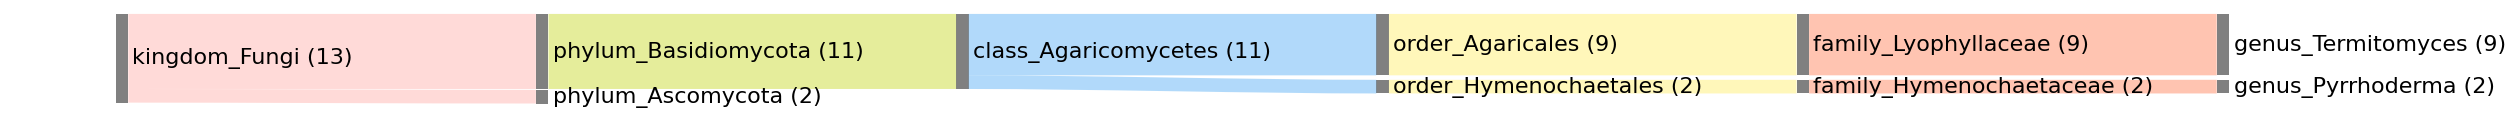

/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/home/raingel/桌面/nanopore_working/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


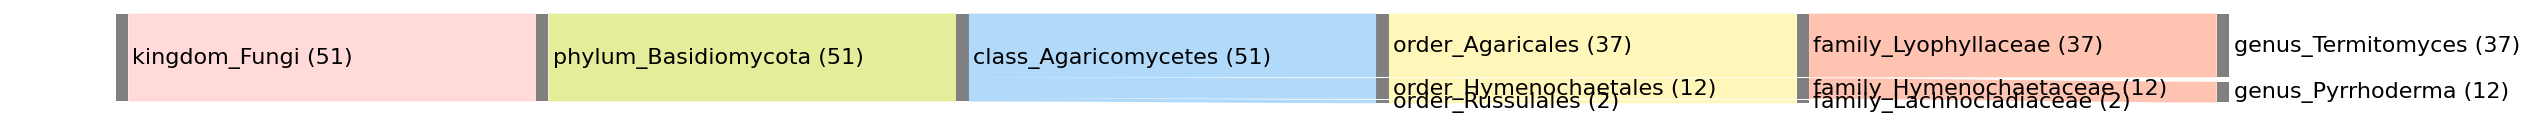

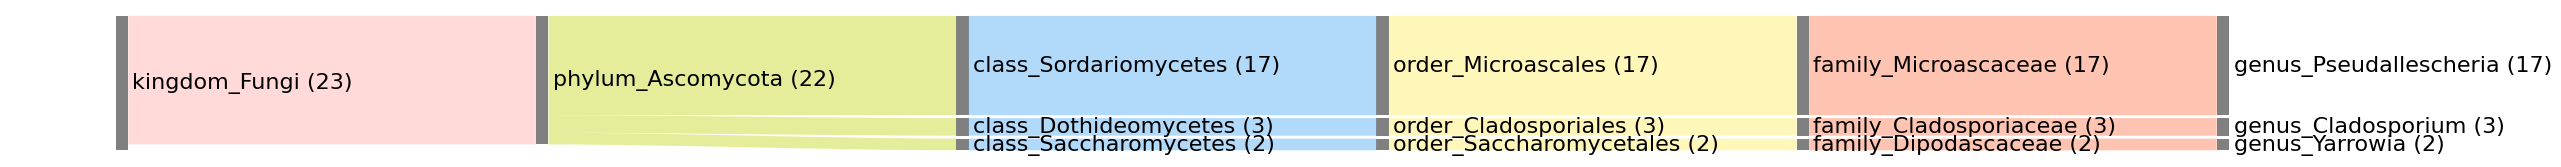

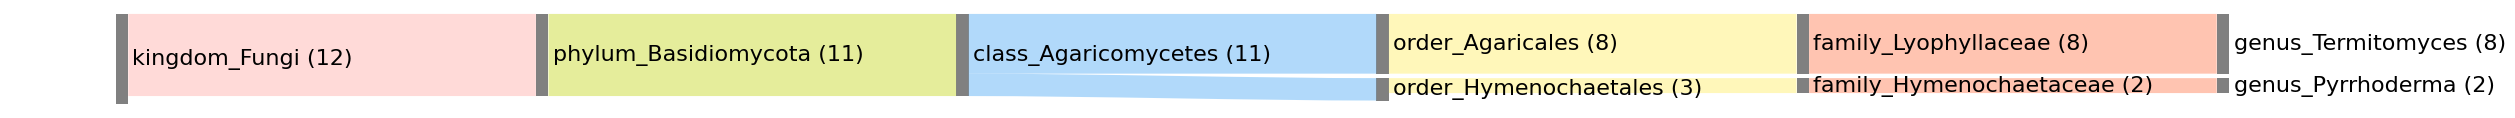

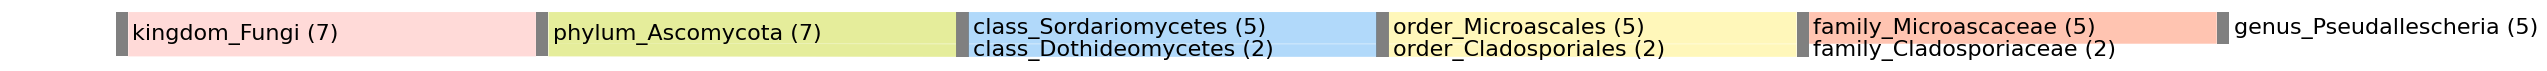

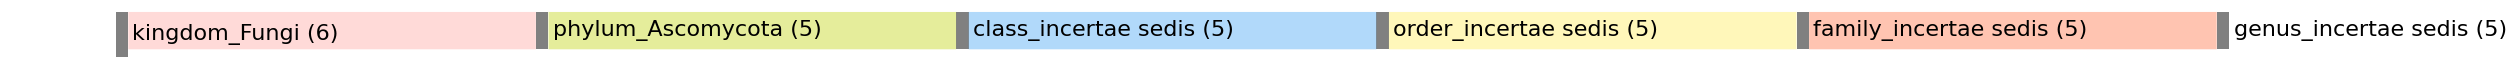

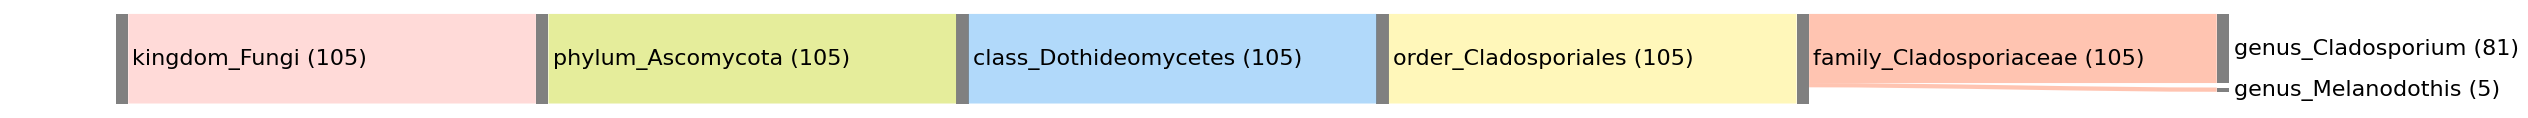

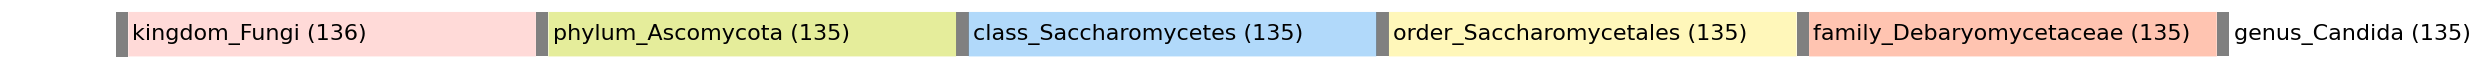

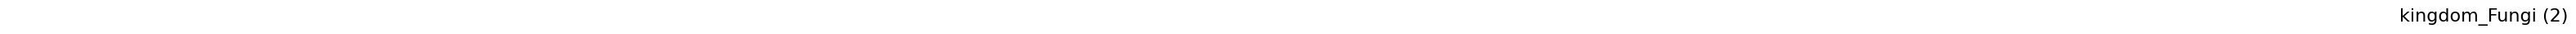

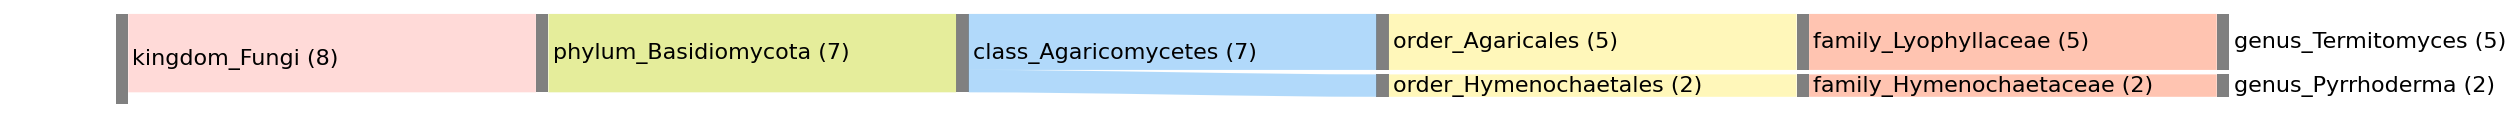

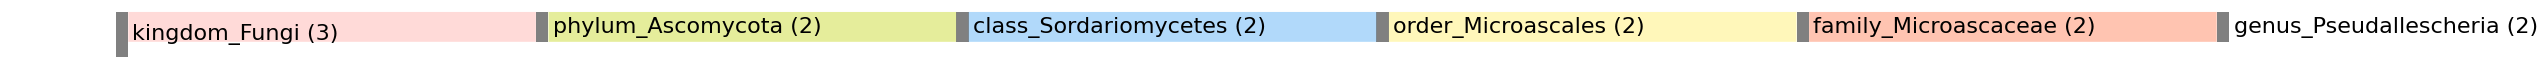

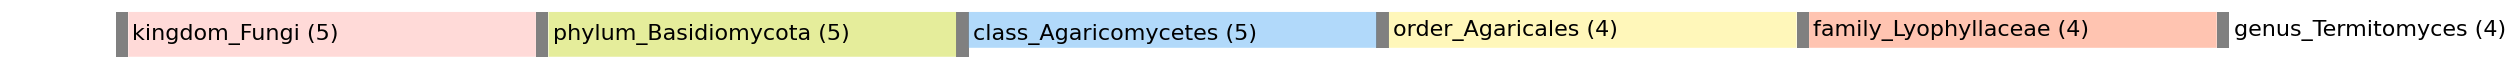

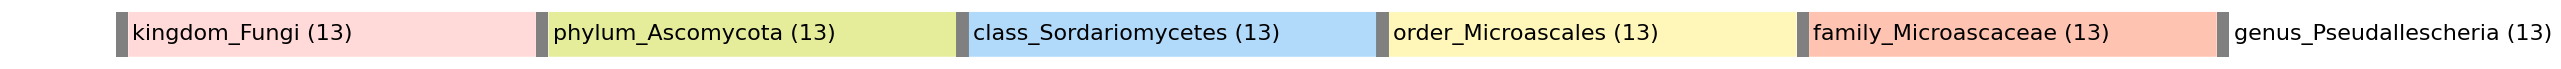

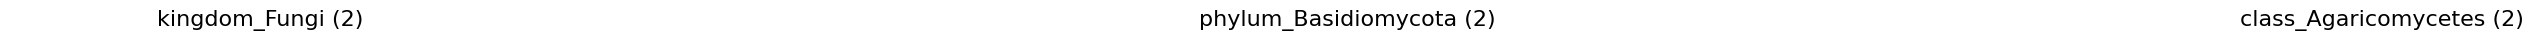

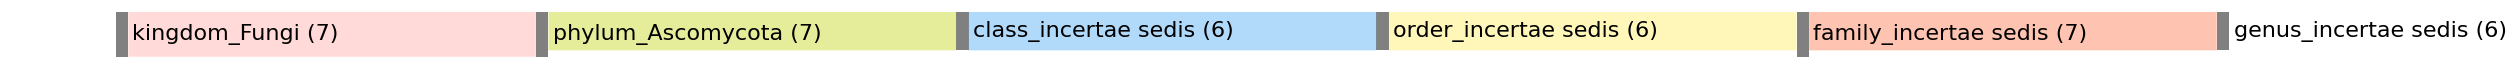

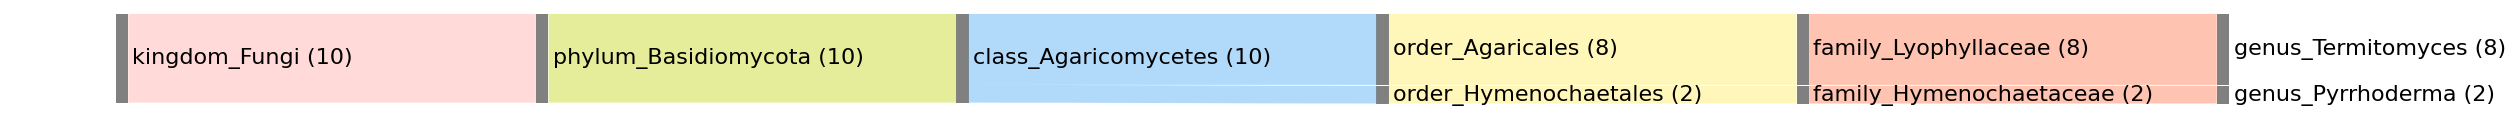

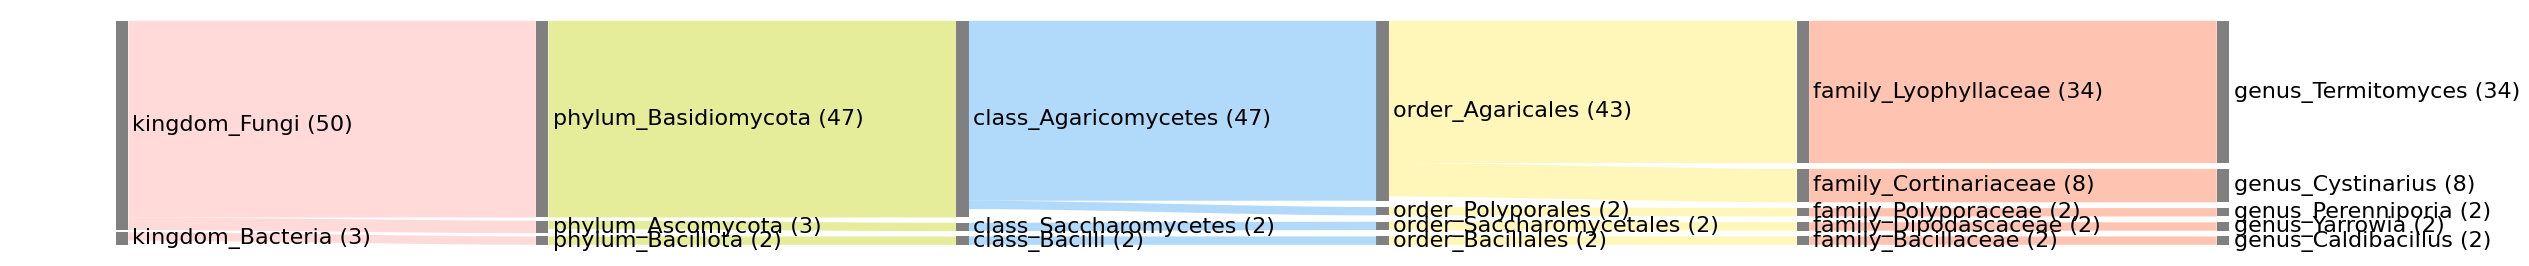

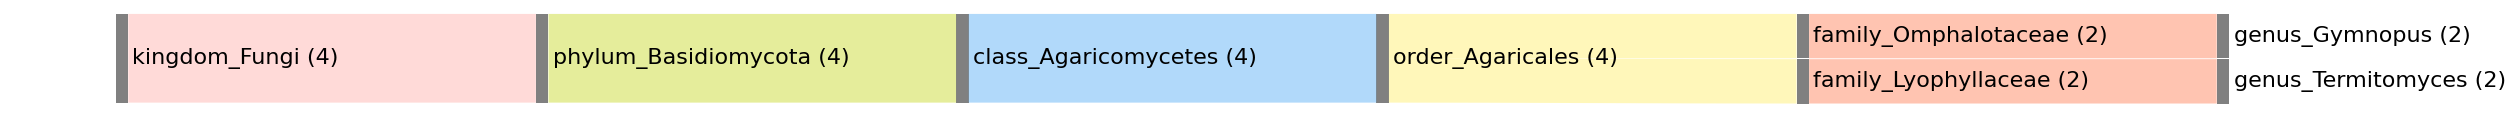

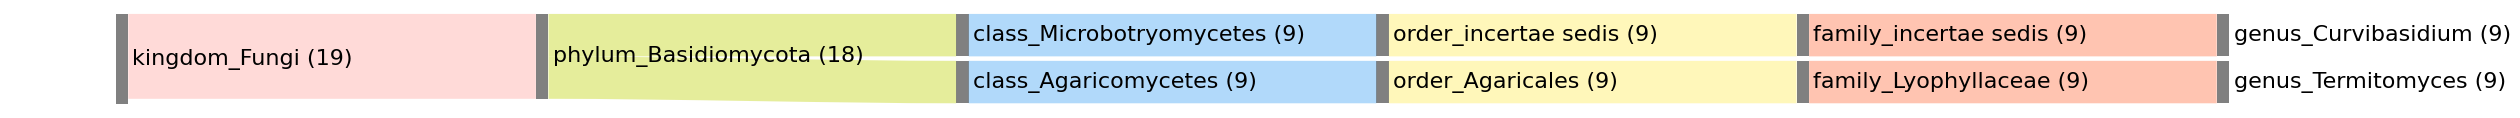

In [6]:
#custom_taxonomy_sankey是用來將mmseqs2輸出的taxonomyResult.tsv進行Sankey diagram的視覺化
dumb.custom_taxonomy_sankey(src="./nanoact/sample/6_1_taxonomy_assign/",  #Input: 一個資料夾，資料夾中包含以SampleID為檔名的taxonomyResult.tsv檔案，例如 SampleID.taxonomyResult.tsv
                                des="./nanoact/sample/6_1_taxonomy_assign/",  #Output: 一個資料夾，程式會在該資料夾中輸出以SampleID為檔名的檔案
                                img_ext="png", #img_ext: 輸出檔案的格式，預設為png。可以matplotlib支援的格式，如png、svg、jpg等。
                                minimal_reads=2, #當一個taxon的reads數量小於minimal_reads時則不顯示
                                vertical_scale=0.8 #圖片的垂直高度，需要視情況調整，若發現輸出的圖片有字重疊的情形，可以把vertical_scale調大
                                )